k-means

In [0]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import io

proses penginputan data 

In [68]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [69]:
DataIris = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
DataIris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


preposesing

data yang diolah untuk membentuk adalah tabel SepalLengthCm, SepalWidthCm,PetalLengthCm dan PetalWidthCm
sedangkan hasil klasifikasi data utama dipisah dengan tujuan nantinya akan dibandingkan dengan hasil

In [70]:
X=DataIris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=DataIris['Species']
print(X,Y)
# print(type(X))
# print(type(Y))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

standarisasi

In [0]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

Modeling
dengan metode k-means++ jumlah cluster 3 dan jumlah minimal perpindahan titik sebanya n_init


In [72]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


pemodelan dalam bentuk 3 dimensi dengan parameter x,y,z sebagai SepalWidthCm, SepalLengthCm, dan PetalLengthCm (karna tidak bisa lebih dari 3D)

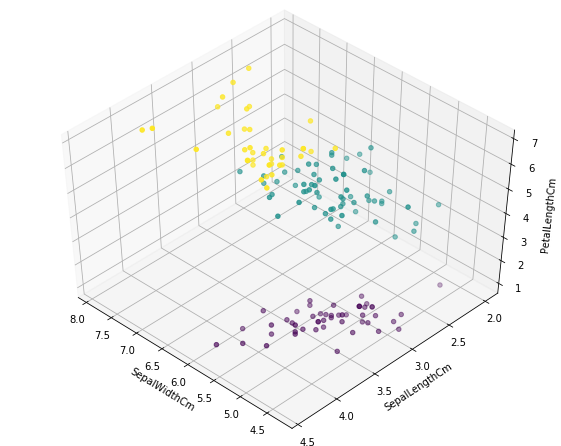

In [73]:
# print(X[:,3])
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('SepalWidthCm')
ax.set_ylabel('SepalLengthCm')
ax.set_zlabel('PetalLengthCm')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))


In [74]:
# # print(Y)
type(Y)
z=pd.Series(['',''])
# Z
i=0
for y in Y:
  # print(y)
  if y=="Iris-setosa":
    # print("0")
    z[i]=0
  elif y=="Iris-versicolor":
    # print("1")
    z[i]=1
  elif y=="Iris-virginica":
    # print("2")
    z[i]=2
  else:
    # print("error")
    z[i]=3
  i=i+1
print(z)
# X.shape

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: object


In [75]:
jumlah=0
benar=0
salah=0
# labels[0]
i=0
for label in labels:
  # print("label ke",i)
  # print(label)
  if label == z[i]:
    # print(label)
    # print("benar")
    # print(z[i])
    jumlah=jumlah+1
    benar=benar+1
  else:
    # print(label)
    # print("salah")
    # print(z[i])
    jumlah=jumlah+1
    salah=salah+1

  i=i+1
  
print(float(benar/salah))

8.375


nilai akurasi dicoba dengan mencari jumlah benar dan jumlah salah
karna pelebelan dilakukan oleh <code>k_means.labels_</code>
(dalam kasus ini range 0-2) tidak diketahui pasti mana yang "Iris-setosa", "Iris-versicolor" ataupun "Iris-virginica"